<a href="https://colab.research.google.com/github/jinyuton-maker/Project1/blob/main/Project2_Cookie_Cats_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Import data

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)
df.head()

Saving cookie_cats.xlsx to cookie_cats (2).xlsx


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


2.Check missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


3.Count the number of each group

In [ ]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


4.Analyzing player behavior

<Axes: >

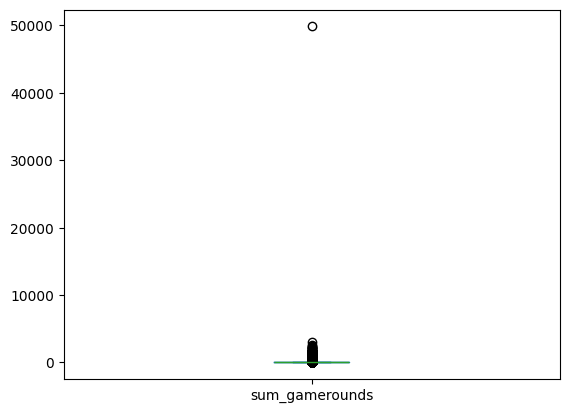

In [ ]:
df['sum_gamerounds'].plot.box()

5.Check the percentiles

In [ ]:
df['sum_gamerounds'].describe()

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,49854.000000


In [ ]:
# Count the number of players for each gameround
plot_df = df.groupby('sum_gamerounds')['userid'].count()
plot_df

,userid
sum_gamerounds,
0,3994
1,5538
2,4606
3,3958
4,3629
...,...
2294,1
2438,1
2640,1


Text(0, 0.5, 'The number of players')

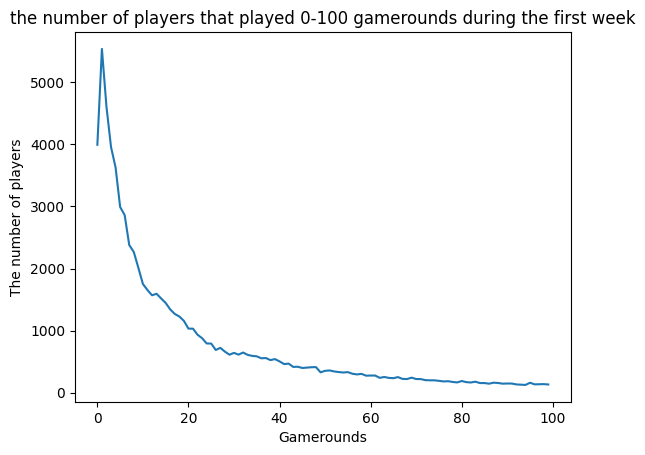

In [ ]:
# Draw the distribution of players that played 0-100 gamerounds during the first week
%matplotlib inline
ax = plot_df[:100].plot()
ax.set_title('the number of players that played 0-100 gamerounds during the first week')
ax.set_xlabel('Gamerounds')
ax.set_ylabel('The number of players')

The distribution is highly skewed, with a long tail on the right. A huge number of players played fewer than 20 rounds and left the game. For rounds greater than 60, the number of players stayed steady at about 300.

6.Explore the correlation between gamerounds, retention_1 and retention_7

<Axes: >

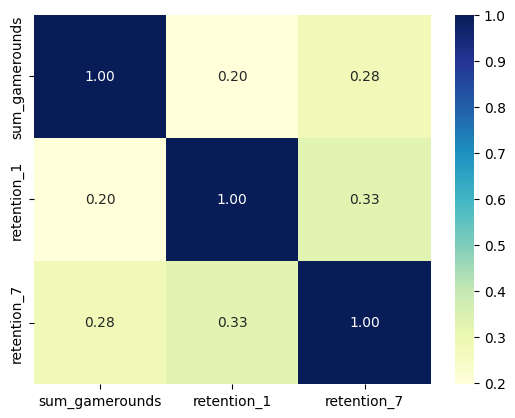

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Convert boolean columns to integer
df['retention_1'] = df['retention_1'].astype(int)
df['retention_7'] = df['retention_7'].astype(int)
sns.heatmap(df[['sum_gamerounds', 'retention_1', 'retention_7']].corr(), annot=True, fmt='.2f', cmap='YlGnBu')

(0.0, 3500.0)

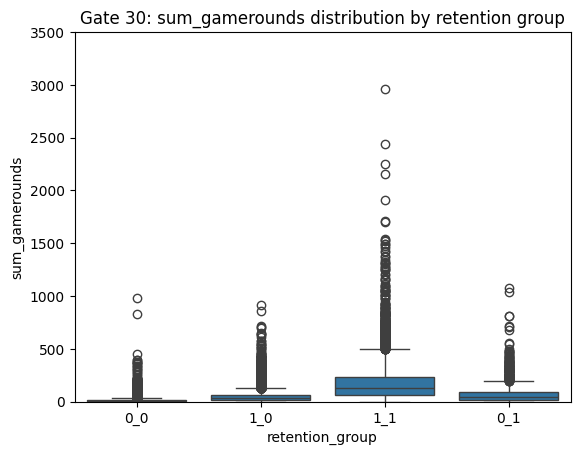

In [ ]:
# Create a new column combining retention_1 and retention_7
df['retention_group'] = df['retention_1'].astype(str) + '_' + df['retention_7'].astype(str)

# Filter data for gate_30 and gate_40
df_gate_30 = df[df['version'] == 'gate_30']
df_gate_40 = df[df['version'] == 'gate_40']

# Create box plot for gate_30
sns.boxplot(x='retention_group', y='sum_gamerounds', data=df_gate_30).set_title('Gate 30: sum_gamerounds distribution by retention group')
plt.ylim(0, 3500)

Text(0.5, 1.0, 'Gate 40: sum_gamerounds distribution by retention group')

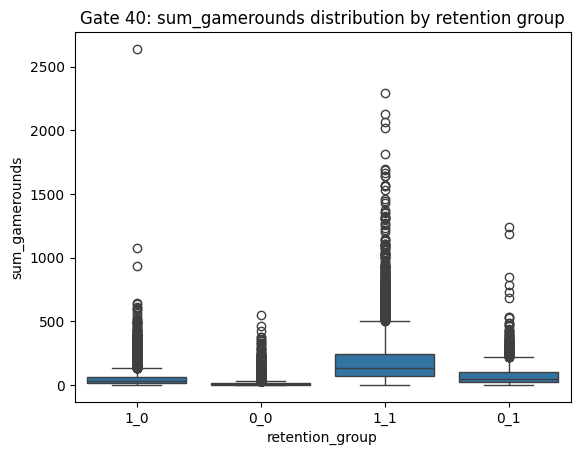

In [ ]:
# Create box plot for gate_40
sns.boxplot(x='retention_group', y='sum_gamerounds', data=df_gate_40).set_title('Gate 40: sum_gamerounds distribution by retention group')

7.Comparing 1 day retention

In [ ]:
# Overall 1-day retention
df['retention_1'].sum() / df['retention_1'].count()

np.float64(0.4452095044850259)

A little less than half of the players come back one day after installing the game.

In [ ]:
# 1-day retention between gate30 and gate40
df.groupby('version')['retention_1'].mean()

,retention_1
version,
gate_30,0.448188
gate_40,0.442283


It appears that there was a slight decrease in 1-day retention when the gate was moved to level 40 (44.2%) compared to the control when it was at level 30 (44.8%).

Bootstrapping: a resampling-based statistical method by repeatedly drawing samples with replacement from the original data

In [ ]:
# Create a list storing the bootstrapped means for each group
boot_1 = []
for i in range(1000):
  boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
  boot_1.append(boot_mean)
# Transforming the list to a dataframe
boot_1 = pd.DataFrame(boot_1)
boot_1

version,gate_30,gate_40
retention_1,0.446056,0.443895
retention_1,0.451190,0.443567
retention_1,0.443767,0.439099
retention_1,0.443603,0.445735
retention_1,0.446965,0.441833
...,...,...
retention_1,0.450112,0.440185
retention_1,0.449727,0.440848
retention_1,0.451424,0.442039
retention_1,0.449146,0.440693


<Axes: ylabel='Density'>

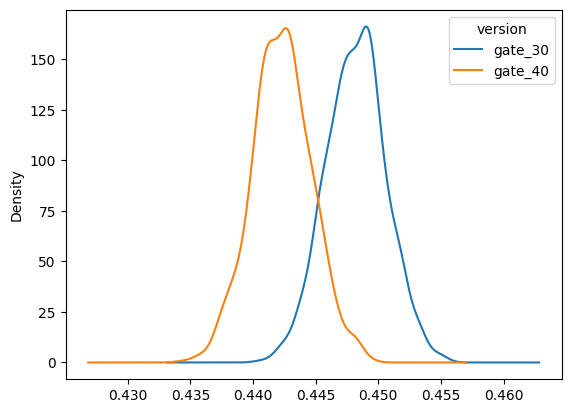

In [ ]:
# Draw a Kernel Density Estimate plot
boot_1.plot(kind='density')

Calculate probability that 1-day retention is greater when the gate is at level 30



Probability that 1-day retention is greater when the gate is at level 30: 0.958


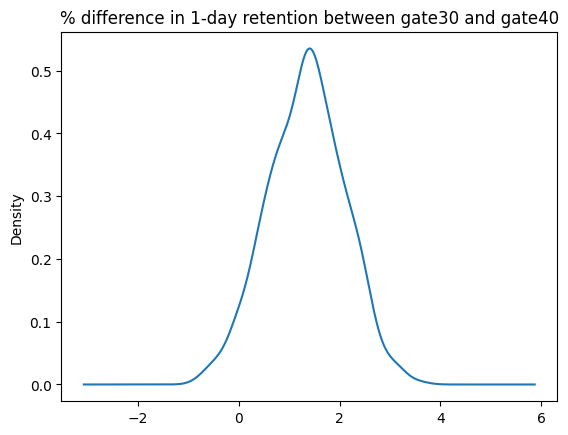

In [ ]:
# Add a % difference of retention_1 between gate30 and gate40
boot_1['diff'] = (boot_1['gate_30'] - boot_1['gate_40']) / boot_1['gate_40'] * 100

# Plot the % difference
ax = boot_1['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between gate30 and gate40')

# Calculate probability that 1-day retention is greater when the gate is at level 30
print('Probability that 1-day retention is greater when the gate is at level 30:', (boot_1['diff']>0).mean())

From this chart, we can see that the most likely % difference is around 1% - 2%, and that 96% of the distribution is above 0%, in favor of a gate at level 30.

8.Comparing 7 day retention

In [ ]:
# Overall 7-day retention
df['retention_7'].sum() / df['retention_7'].count()

np.float64(0.1860648194347426)

About 18.6% players come back seven days after installing the game

In [ ]:
# 7-day retention between gate30 and gate40
df.groupby('version')['retention_7'].mean()

,retention_7
version,
gate_30,0.190201
gate_40,0.182000


It appears that there was a slight decrease in 7-day retention when the gate was moved to level 40 (18.2%) compared to the control when it was at level 30 (19.0%).

**Bootstrapping**

In [ ]:
boot_7 = []
for i in range(2000):
  boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
  boot_7.append(boot_mean)
boot_7 = pd.DataFrame(boot_7)
boot_7

version,gate_30,gate_40
retention_7,0.191795,0.181215
retention_7,0.192069,0.182448
retention_7,0.192525,0.182939
retention_7,0.190891,0.181087
retention_7,0.189657,0.180732
...,...,...
retention_7,0.189453,0.181838
retention_7,0.188959,0.181600
retention_7,0.191395,0.182094
retention_7,0.187758,0.181120


<Axes: ylabel='Density'>

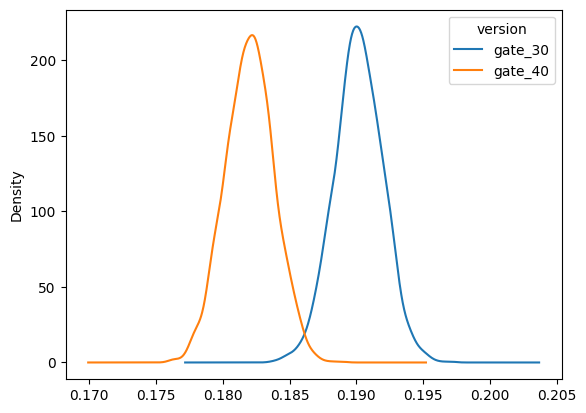

In [ ]:
# Draw a Kernel Density Estimate plot
boot_7.plot(kind='density')

Probability that 7-day retention is greater when the gate is at level 30: 0.9990


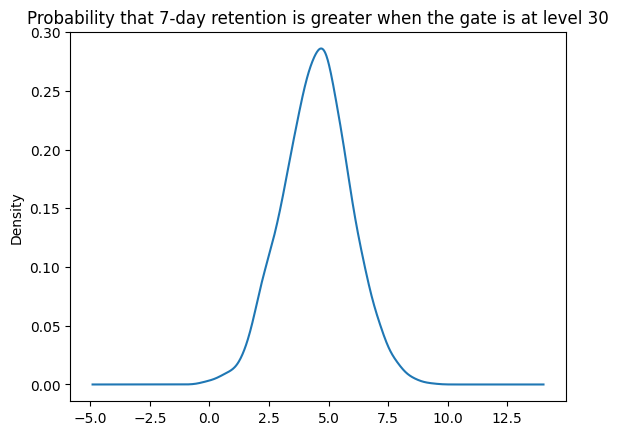

In [ ]:
# Calculate probability that 7-day retention is greater when the gate is at level 30
boot_7['diff'] = (boot_7['gate_30'] - boot_7['gate_40']) / boot_7['gate_40'] * 100
ax = boot_7['diff'].plot(kind='density')
ax.set_title('Probability that 7-day retention is greater when the gate is at level 30')
print(f'Probability that 7-day retention is greater when the gate is at level 30: {(boot_7['diff']>0).mean():.4f}')

From this chart, we can see that the most likely % difference is around 4% - 5%, and that 100% of the distribution is above 0%, in favor of a gate at level 30.

**9.Conclusion**

The bootstrap result tells us that there is strong evidence that 7-day retention is higher when the gate is at level 30 than when it is at level 40. The conclusion is: If we want to keep retention high — both 1-day and 7-day retention — we should not move the gate from level 30 to level 40.

There are, of course, other metrics we could look at, like the number of game rounds played or how much in-game purchases are made by the two AB-groups. But retention is one of the most important metrics. If we don't retain our player base, it doesn't matter how much money they spend in-game.

So, why is retention higher when the gate is positioned earlier? One could expect the opposite: The later the obstacle, the longer people are going to engage with the game. But this is not what the data tells us. The theory of hedonic adaptation can give one explanation for this.

In short, hedonic adaptation is the tendency for people to get less and less enjoyment out of a fun activity over time if that activity is undertaken continuously. By forcing players to take a break when they reach a gate, their enjoyment of the game is prolonged. But when the gate is moved to level 40, fewer players make it far enough, and they are more likely to quit the game because they simply got bored of it.

**Bonus:T-test**  


H0:P30<P40, H1:P30>P40  


For retention_1

In [ ]:
from scipy import stats
import statsmodels.api as sm
# Custom function for t-test (assuming equal variances)
def t_test(sample1, sample2):
    mean1 = sample1.mean()
    mean2 = sample2.mean()
    std1 = sample1.std(ddof=1)
    std2 = sample2.std(ddof=1)
    n1 = len(sample1)
    n2 = len(sample2)

    # Pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

    # T-statistic
    t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))

    # Degrees of freedom
    df = n1 + n2 - 2

    # P-value
    p_value = 1 - stats.t.cdf(abs(t_statistic), df)

    return t_statistic, p_value

# Prepare data for t-test
retention_1_gate30 = df[df['version'] == 'gate_30']['retention_1']
retention_1_gate40 = df[df['version'] == 'gate_40']['retention_1']

# Perform t-test using the custom function
t_stat_custom, p_value_custom = t_test(retention_1_gate30, retention_1_gate40)
print(f"Custom T-test (retention_1): T-statistic = {t_stat_custom:.4f}, P-value = {p_value_custom:.4f}")

# Perform t-test using statsmodels
ttest_results = stats.ttest_ind(retention_1_gate30, retention_1_gate40, equal_var=True, alternative='greater')
print(f"Statsmodels T-test (retention_1): T-statistic = {ttest_results.statistic:.4f}, P-value = {ttest_results.pvalue:.4f}")

Custom T-test (retention_1): T-statistic = 1.7841, P-value = 0.0372
Statsmodels T-test (retention_1): T-statistic = 1.7841, P-value = 0.0372


For retention_7

In [ ]:
# Prepare data for t-test
retention_7_gate30 = df[df['version'] == 'gate_30']['retention_7']
retention_7_gate40 = df[df['version'] == 'gate_40']['retention_7']

# Perform t-test using the custom function
t_stat_custom, p_value_custom = t_test(retention_7_gate30, retention_7_gate40)
print(f"Custom T-test (retention_1): T-statistic = {t_stat_custom:.4f}, P-value = {p_value_custom:.4f}")

# Perform t-test using statsmodels
ttest_results = stats.ttest_ind(retention_7_gate30, retention_7_gate40, equal_var=True, alternative='greater')
print(f"Statsmodels T-test (retention_1): T-statistic = {ttest_results.statistic:.4f}, P-value = {ttest_results.pvalue:.4f}")

Custom T-test (retention_1): T-statistic = 3.1645, P-value = 0.0008
Statsmodels T-test (retention_1): T-statistic = 3.1645, P-value = 0.0008


**Bonus:Z-test**

For retention_1

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Custom function for z-test for two proportions
def z_test_proportions(count1, nobs1, count2, nobs2):
    # Pooled proportion
    p_pooled = (count1 + count2) / (nobs1 + nobs2)

    # Standard error
    se = np.sqrt(p_pooled * (1 - p_pooled) * (1/nobs1 + 1/nobs2))

    # Z-statistic
    z_statistic = (count1/nobs1 - count2/nobs2) / se

    # P-value
    p_value = 1 - stats.norm.cdf(abs(z_statistic))

    return z_statistic, p_value

# Prepare data for z-test
retention_1_gate30_count = df[df['version'] == 'gate_30']['retention_1'].sum()
retention_1_gate30_nobs = df[df['version'] == 'gate_30']['retention_1'].count()
retention_1_gate40_count = df[df['version'] == 'gate_40']['retention_1'].sum()
retention_1_gate40_nobs = df[df['version'] == 'gate_40']['retention_1'].count()

# Perform z-test using the custom function
z_stat_custom, p_value_custom = z_test_proportions(retention_1_gate30_count, retention_1_gate30_nobs, retention_1_gate40_count, retention_1_gate40_nobs)
print(f"Custom Z-test (retention_1): Z-statistic = {z_stat_custom:.4f}, P-value = {p_value_custom:.4f}")

# Perform z-test using statsmodels
z_stat_sm, p_value_sm = proportions_ztest([retention_1_gate30_count, retention_1_gate40_count], [retention_1_gate30_nobs, retention_1_gate40_nobs], alternative='larger')
print(f"Statsmodels Z-test (retention_1): Z-statistic = {z_stat_sm:.4f}, P-value = {p_value_sm:.4f}")

Custom Z-test (retention_1): Z-statistic = 1.7841, P-value = 0.0372
Statsmodels Z-test (retention_1): Z-statistic = 1.7841, P-value = 0.0372


For retention_7

In [ ]:
# Prepare data for z-test
retention_7_gate30_count = df[df['version'] == 'gate_30']['retention_7'].sum()
retention_7_gate30_nobs = df[df['version'] == 'gate_30']['retention_7'].count()
retention_7_gate40_count = df[df['version'] == 'gate_40']['retention_7'].sum()
retention_7_gate40_nobs = df[df['version'] == 'gate_40']['retention_7'].count()

# Perform z-test using the custom function
z_stat_custom, p_value_custom = z_test_proportions(retention_7_gate30_count, retention_7_gate30_nobs, retention_7_gate40_count, retention_7_gate40_nobs)
print(f"Custom Z-test (retention_1): Z-statistic = {z_stat_custom:.4f}, P-value = {p_value_custom:.4f}")

# Perform z-test using statsmodels
z_stat_sm, p_value_sm = proportions_ztest([retention_7_gate30_count, retention_7_gate40_count], [retention_7_gate30_nobs, retention_7_gate40_nobs], alternative='larger')
print(f"Statsmodels Z-test (retention_1): Z-statistic = {z_stat_sm:.4f}, P-value = {p_value_sm:.4f}")

Custom Z-test (retention_1): Z-statistic = 3.1644, P-value = 0.0008
Statsmodels Z-test (retention_1): Z-statistic = 3.1644, P-value = 0.0008


Becuase P values are all less than 0.05 through T-test and Z-test, we can draw the same conclsion that both 1-day retention and 7-dat retention are higher when the gate is at level 30 than when it is at level 40.  